In [1]:
%pip install box-embeddings

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import numpy
from box_embeddings.parameterizations import BoxTensor, MinDeltaBoxTensor, SigmoidBoxTensor
from box_embeddings.modules.volume.volume import Volume
from box_embeddings.modules.intersection import Intersection
from box_embeddings.parameterizations.box_tensor import BoxFactory, BoxTensor
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [3]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

Types of boxes

In [4]:
from box_embeddings.parameterizations import BoxTensor, MinDeltaBoxTensor, SigmoidBoxTensor

tensor = torch.Tensor([[-1,-1],[2,2]])
tensor_1 = torch.Tensor([[-2,-2],[3,3]])
def create_box_tensor(tensor):
  box_tensor = BoxTensor(tensor)
  return box_tensor

def create_MinDelta_tensor(tensor):
  box_tensor = MinDeltaBoxTensor(tensor)
  return box_tensor

def create_Sigmoid_tensor(tensor):
  box_tensor = SigmoidBoxTensor(tensor)
  return box_tensor

def print_point(box_tensor):
  print("z: ",box_tensor.z)
  print("Z: ",box_tensor.Z)

box_tensor = create_box_tensor(tensor)
box_tensor_min = create_MinDelta_tensor(tensor)
box_tensor_sigmoid = create_Sigmoid_tensor(tensor)

box_tensor_1 = create_box_tensor(tensor_1)
box_tensor_min_1 = create_MinDelta_tensor(tensor_1)
box_tensor_sigmoid_1 = create_Sigmoid_tensor(tensor_1)

print("Box_normale")
print_point(box_tensor)
print("Box_min")
print_point(box_tensor_min)
print("Box_sigmoid")
print_point(box_tensor_sigmoid)

Box_normale
z:  tensor([-1., -1.])
Z:  tensor([2., 2.])
Box_min
z:  tensor([-1., -1.])
Z:  tensor([1.1269, 1.1269])
Box_sigmoid
z:  tensor([0.2689, 0.2689])
Z:  tensor([0.9129, 0.9129])


Types of volumes

In [6]:
from box_embeddings.modules.volume.volume import Volume
# torna valori in logaritmo
hard_volume = Volume(intersection_temperature=0, volume_temperature=0, log_scale=False)
soft_volume = Volume(intersection_temperature=0, volume_temperature=1.0, log_scale=False)
bessel = Volume(intersection_temperature=1.0, volume_temperature=1.0, log_scale=False)
print("box normale")
print("hard", hard_volume(box_tensor))
print("soft", soft_volume(box_tensor))
print("bessel", bessel(box_tensor))

print("box min")
print("hard", hard_volume(box_tensor_min))
print("soft", soft_volume(box_tensor_min))
print("bessel", bessel(box_tensor_min))

print("box sigmoid")
print("hard", hard_volume(box_tensor_sigmoid))
print("soft", soft_volume(box_tensor_sigmoid))
print("bessel", bessel(box_tensor_sigmoid))


box normale
hard tensor(9.)
soft tensor(9.2939)
bessel tensor(3.9689)
box min
hard tensor(4.5238)
soft tensor(5.0156)
bessel tensor(1.6724)
box sigmoid
hard tensor(0.4146)
soft tensor(1.1365)
bessel tensor(0.2210)


Types of intersection

In [5]:
from box_embeddings.modules.intersection import Intersection

# restituisce un box di intersezione 
hard_intersection = Intersection(intersection_temperature=0)
gumbel_intersection = Intersection(intersection_temperature=1.0)

print("intersezione stesso box normale")
volume = hard_volume(hard_intersection(box_tensor, box_tensor))
print_point(box_tensor)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor, box_tensor))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor, box_tensor))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor, box_tensor))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor, box_tensor))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor, box_tensor))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box normale
z:  tensor([-1., -1.])
Z:  tensor([2., 2.])
hard_volume, hard_int  tensor(9.)
hard_volume, gumbel_int  tensor(2.6040)
soft_volume, hard_int  tensor(9.2939)
soft_volume, gumbel_int  tensor(3.2232)
bessel_volume, hard_int  tensor(3.9689)
bessel_volume, gumbel_int  tensor(0.9005)


In [9]:
print("intersezione stesso box min")
volume = hard_volume(hard_intersection(box_tensor_min, box_tensor_min))
print_point(box_tensor_min)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor_min, box_tensor_min))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor_min, box_tensor_min))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor_min, box_tensor_min))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor_min, box_tensor_min))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor_min, box_tensor_min))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box min
z:  tensor([-1., -1.])
Z:  tensor([1.1269, 1.1269])
hard_volume, hard_int  tensor(4.5238)
hard_volume, gumbel_int  tensor(0.5485)
soft_volume, hard_int  tensor(5.0156)
soft_volume, gumbel_int  tensor(1.2781)
bessel_volume, hard_int  tensor(1.6724)
bessel_volume, gumbel_int  tensor(0.2576)


In [38]:
print("intersezione stesso box sigmoid")
volume = hard_volume(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print_point(box_tensor_sigmoid)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box sigmoid


NameError: name 'hard_volume' is not defined

In [2]:
def extract_embeddings(boxes):
        list_box = []
        list_box.append(boxes.z.data.tolist())
        list_box.append(boxes.Z.data.tolist())
        return list_box

In [96]:
# Initialization
data_x = torch.tensor([[-2, -2], [+2., +3.]], requires_grad=True)
box_target = SigmoidBoxTensor(data_x)

data_t = torch.tensor([[-3, -1], [+1., +1.]], requires_grad=True)
box_target_1 = SigmoidBoxTensor(data_t)

data_y = torch.tensor([[-5, -10.5], [-1., +1]], requires_grad=True)
box_positive = SigmoidBoxTensor(data_y)

data_k = torch.tensor([[-3., -3.0], [-2., -1.5]], requires_grad=True)
box_negative_2 = SigmoidBoxTensor(data_k)

data_z = torch.tensor([[-2.8, -2.1], [-4., -3]], requires_grad=True)
box_negative = SigmoidBoxTensor(data_z)

data_p = torch.tensor([[-2, -2.6], [-3., -3]], requires_grad=True)
box_negative_3 = SigmoidBoxTensor(data_p)

data_i = torch.tensor([[-2, -1.6], [-2., -3]], requires_grad=True)
box_negative_4 = SigmoidBoxTensor(data_i)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


volume red  0.6324684619903564
volume purple  0.023936305195093155
volume green 0.18929871916770935
volume black  0.006185535341501236
volume blue  0.0074390689842402935
volume orange  0.010663466528058052
sim purple-red  0.44479212164878845
sim black-red  0.5707865357398987
sim green-red  0.5219705700874329
sim blue-red  0.6687195897102356
sim orange-red  0.9605792164802551
P(purple|red)  0.016833538189530373
P(black|red)  0.005582287907600403
P(black|purple)  0.2525872588157654
P(green|red)  0.1562265306711197
P(red|green)  0.5219705700874329
P(red & green)  0.09880836308002472
P(green|black)  0.9995495080947876
P(green|purple)  0.1262781322002411
P(green|blue)  0.03929536044597626
P(blue|red)  0.007865455001592636
P(blue|black)  0.4766651391983032
P(blue|purple)  0.2943739891052246
P(orange|blue)  0.45627790689468384
P(orange|black)  0.4088330864906311
P(orange|red)  0.016195442527532578


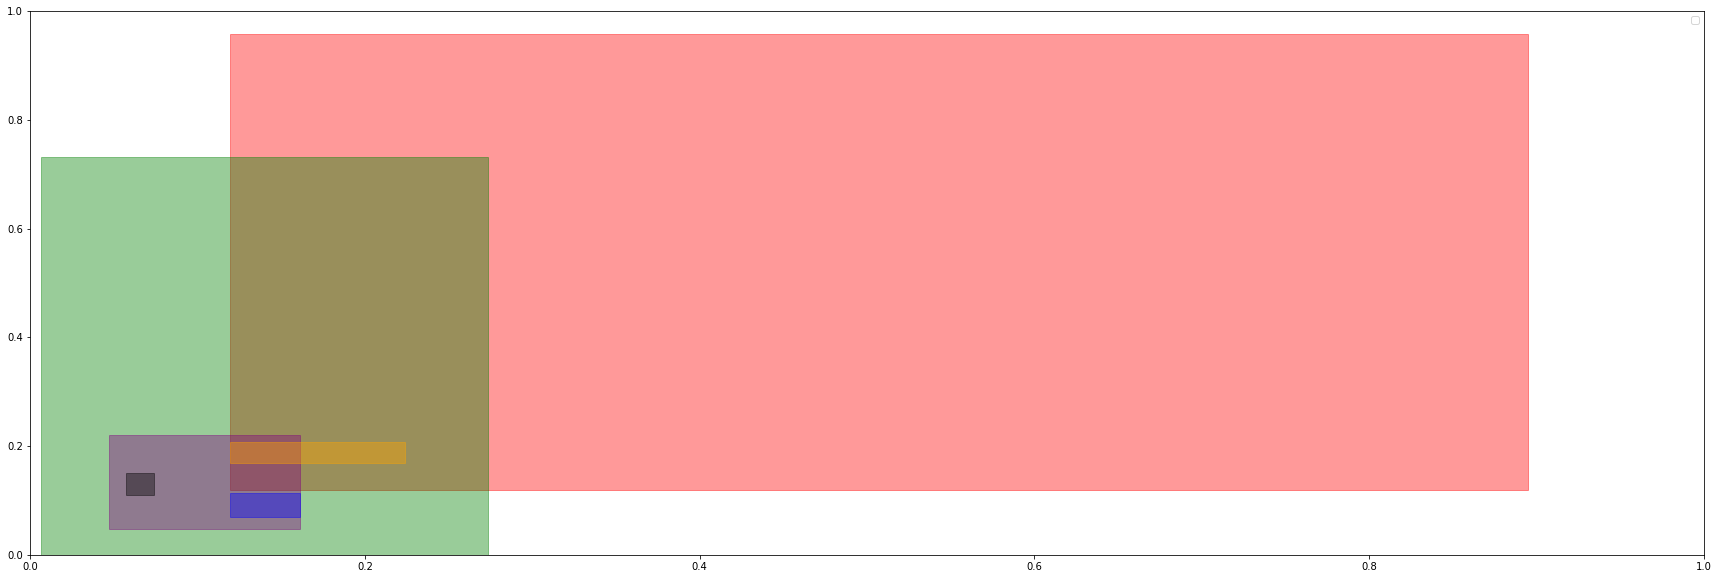

In [97]:
import matplotlib.patches as patches

volume_ = Volume(volume_temperature=0.1, intersection_temperature=0.01)
intersection_ = Intersection(intersection_temperature=0.01)

print("volume red ", torch.exp(volume_(box_target)).item())
print("volume purple ",torch.exp(volume_(box_negative_2)).item())
print("volume green", torch.exp(volume_(box_positive)).item())
print("volume black ", torch.exp(volume_(box_negative)).item())
print("volume blue ", torch.exp(volume_(box_negative_3)).item())
print("volume orange ", torch.exp(volume_(box_negative_4)).item())

volumes = volume_(intersection_(box_positive, box_target)) -torch.minimum(volume_(box_positive), volume_(box_target))
volumes_2 = volume_(intersection_(box_negative_2, box_target)) -torch.minimum(volume_(box_negative_2), volume_(box_target))
volumes_3 = volume_(intersection_(box_negative, box_target)) -torch.minimum(volume_(box_negative), volume_(box_target))
volumes_8 = volume_(intersection_(box_negative_3, box_target)) -torch.minimum(volume_(box_negative_3), volume_(box_target))
volumes_13 = volume_(intersection_(box_negative_4, box_target)) - torch.minimum(volume_(box_negative_4), volume_(box_target))



print("sim purple-red ", torch.exp(volumes_2).item())
print("sim black-red ", torch.exp(volumes_3).item())
print("sim green-red ", torch.exp(volumes).item())
print("sim blue-red ", torch.exp(volumes_8).item())
print("sim orange-red ", torch.exp(volumes_13).item())

volumes = volume_(intersection_(box_positive, box_target)) - volume_(box_target)
volumes_1 = volume_(intersection_(box_target, box_positive)) - volume_(box_positive)
volumes_ = volume_(intersection_(box_target, box_positive))
volumes_2 = volume_(intersection_(box_negative_2, box_target)) - volume_(box_target)
volumes_3 = volume_(intersection_(box_negative, box_target)) - volume_(box_target)
volumes_4 = volume_(intersection_(box_negative, box_negative_2)) - volume_(box_negative_2)
volumes_5 = volume_(intersection_(box_positive, box_negative)) - volume_(box_negative)
volumes_6 = volume_(intersection_(box_negative_2, box_positive)) - volume_(box_positive)
volumes_7 = volume_(intersection_(box_negative_3, box_positive)) - volume_(box_positive)
volumes_8 = volume_(intersection_(box_negative_3, box_target)) - volume_(box_target)
volumes_9 = volume_(intersection_(box_negative_3, box_negative)) - volume_(box_negative)
volumes_10 = volume_(intersection_(box_negative_3, box_negative_2)) - volume_(box_negative_2)
volumes_11 = volume_(intersection_(box_negative_4, box_negative_3)) - volume_(box_negative_3)
volumes_12 = volume_(intersection_(box_negative_4, box_negative)) - volume_(box_negative)
volumes_13 = volume_(intersection_(box_negative_4, box_target)) - volume_(box_target)


print("P(purple|red) ", torch.exp(volumes_2).item())
print("P(black|red) ", torch.exp(volumes_3).item())
print("P(black|purple) ", torch.exp(volumes_4).item())
print("P(green|red) ", torch.exp(volumes).item())
print("P(red|green) ", torch.exp(volumes_1).item())
print("P(red & green) ", torch.exp(volumes_).item())
print("P(green|black) ", torch.exp(volumes_5).item())
print("P(green|purple) ", torch.exp(volumes_6).item())
print("P(green|blue) ", torch.exp(volumes_7).item())
print("P(blue|red) ", torch.exp(volumes_8).item())
print("P(blue|black) ", torch.exp(volumes_9).item())
print("P(blue|purple) ", torch.exp(volumes_10).item())
print("P(orange|blue) ", torch.exp(volumes_11).item())
print("P(orange|black) ", torch.exp(volumes_12).item())
print("P(orange|red) ", torch.exp(volumes_13).item())


target_list = extract_embeddings(box_target)
context_list = extract_embeddings(box_positive)
negative_list_2 = extract_embeddings(box_negative_2)
negative_list = extract_embeddings(box_negative)
negative_list_3 = extract_embeddings(box_negative_3)
negative_list_4 = extract_embeddings(box_negative_4)

def load_boxes(box, color):

  rect = patches.Rectangle((box[0][0], box[0][1]), 
                              box[1][0] - box[0][0], 
                              box[1][1] - box[0][1], 
                              facecolor=color, edgecolor = color, alpha=0.4)
      
  
  return rect

rect_target = load_boxes(target_list, "red")
rect_positive = load_boxes(context_list, "green")
rect_negative = load_boxes(negative_list, "black")
rect_negative_2 = load_boxes(negative_list_2, "purple")
rect_negative_3 = load_boxes(negative_list_3, "blue")
rect_negative_4 = load_boxes(negative_list_4, "orange")


fig, ax = plt.subplots(figsize=(30, 10))
plt.xlim([0, +1])
plt.ylim([0, +1])


ax.add_patch(rect_target)
ax.add_patch(rect_positive)
ax.add_patch(rect_negative_2)
ax.add_patch(rect_negative)
ax.add_patch(rect_negative_3)
ax.add_patch(rect_negative_4)
ax.legend()

In [98]:
from torch.nn.modules.loss import L1Loss
from box_embeddings.modules.regularization import l2_side_regularizer
box_vol = Volume(volume_temperature=0.1, intersection_temperature=0.01)
box_int = Intersection(intersection_temperature=0.01)
import math
from torch import nn 

def rounded_box_vol(arg):
  #return torch.exp(box_vol(arg)).item()
  return torch.exp((box_vol(arg)))

def good_print(text, var):
  template = '|{:30}: {:.4f}|'.format(text, var)
  print(template)


def train(box_target, box_target_1, box_pos, box_pos_2, box_neg_2, box_neg, optimizer, epochs=1):
  best_loss = float('inf')
  best_box_target = None
  best_box_pos = None
  best_box_neg = None
  volume_target = []
  volume_target_1 = []
  volume_positive = []
  volume_positive_2 = []
  volume_negative_2 = []
  volume_negative = []
  volume_int_1_positive = []
  volume_int_1_positive_2 =  []
  volume_int_positive = []
  volume_int_positive_2 =  []
  volume_int_negative_2 = []
  volume_int_negative = []

  target_list = []
  target_1_list = []
  context_list = []
  context_list_1 = []
  context_list_2 = []
  negative_list = []
  
  print('|{:-^38}|'.format(''))

  for e in range(epochs):

    good_print('epoch (before backward):', e)
    print('|{:*^38}|'.format(''))
    good_print("volume parola target: ", rounded_box_vol(box_target))
    volume_target.append(rounded_box_vol(box_target))
    good_print("volume parola target 1: ", rounded_box_vol(box_target_1))
    volume_target_1.append(rounded_box_vol(box_target_1))
    good_print("volume parola positive: ", rounded_box_vol(box_pos))
    volume_positive.append(rounded_box_vol(box_pos))
    good_print("volume parola positive 2: ", rounded_box_vol(box_pos_2))
    volume_positive_2.append(rounded_box_vol(box_pos))
    good_print("volume parola negative 2: ", rounded_box_vol(box_neg_2))
    volume_negative_2.append(rounded_box_vol(box_neg_2))
    good_print("volume parola negative: ", rounded_box_vol(box_neg))
    volume_negative.append(rounded_box_vol(box_neg))
    print('|{:-^38}|'.format(''))
    good_print("volume int target-negative: " , rounded_box_vol(box_int(box_target, box_neg))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_neg)) )
    volume_int_negative.append(rounded_box_vol(box_int(box_target, box_neg))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_neg)))
    good_print("volume int target-negative_2: " , rounded_box_vol(box_int(box_target, box_neg_2))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_neg_2)))
    volume_int_negative_2.append(rounded_box_vol(box_int(box_target, box_neg_2))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_neg_2)))
    good_print("volume int target-positive: " , rounded_box_vol(box_int(box_target, box_pos))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_pos)))
    volume_int_positive.append(rounded_box_vol(box_int(box_target, box_pos))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_pos)))
    good_print("volume int target-positive 2: " , rounded_box_vol(box_int(box_target, box_pos_2))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_pos_2)))
    volume_int_positive_2.append(rounded_box_vol(box_int(box_target, box_pos_2))/torch.minimum(rounded_box_vol(box_target),rounded_box_vol(box_pos_2)))
    good_print("volume int target_1-positive: " , rounded_box_vol(box_int(box_target_1, box_pos))/torch.minimum(rounded_box_vol(box_target_1),rounded_box_vol(box_pos)))
    volume_int_1_positive.append(rounded_box_vol(box_int(box_target_1, box_pos))/torch.minimum(rounded_box_vol(box_target_1),rounded_box_vol(box_pos)))
    good_print("volume int target_1-positive 2: " , rounded_box_vol(box_int(box_target_1, box_pos_2))/torch.minimum(rounded_box_vol(box_target_1),rounded_box_vol(box_pos_2)))
    volume_int_1_positive_2.append(rounded_box_vol(box_int(box_target_1, box_pos_2))/torch.minimum(rounded_box_vol(box_target_1),rounded_box_vol(box_pos_2)))

    target_list.append(extract_embeddings(box_target))
    target_1_list.append(extract_embeddings(box_target_1))
    context_list.append(extract_embeddings(box_pos))
    context_list_1.append(extract_embeddings(box_pos_2))
    context_list_2.append(extract_embeddings(box_neg_2))
    negative_list.append(extract_embeddings(box_neg))
    
    optimizer.zero_grad() 
     

    #loss = - ( box_vol(box_int(box_pos, box_target)) - ( box_vol(box_pos) + box_vol(box_target))  )
    #loss += ( box_vol(box_int(box_neg, box_target)) -  ( box_vol(box_neg)+ box_vol(box_target)) )
    #loss += ( box_vol(box_int(box_neg_2, box_target))  - (box_vol(box_neg_2) + box_vol(box_target)) ) 
    
    #loss = - ( box_vol(box_int(box_pos, box_target)) - torch.minimum(box_vol(box_pos),box_vol(box_target)))
    #loss -= ( box_vol(box_int(box_pos_2, box_target)) - torch.minimum(box_vol(box_pos_2),box_vol(box_target)))
    #loss += ( box_vol(box_int(box_neg, box_target)) -  torch.minimum(box_vol(box_neg),box_vol(box_target)))
    #loss += ( box_vol(box_int(box_neg_2, box_target))  - torch.minimum(box_vol(box_neg_2),box_vol(box_target)))


    #loss = - ( box_vol(box_int(box_pos, box_target)) - box_vol(box_target))
    #loss -= ( box_vol(box_int(box_pos_2, box_target)) - box_vol(box_target)  )
    #loss += ( box_vol(box_int(box_neg, box_target))  - box_vol(box_target))
    #loss += ( box_vol(box_int(box_neg_2, box_target))  - box_vol(box_target) )

    # loss = - ( box_vol(box_int(box_pos_2, box_target))) - ( box_vol(box_int(box_target, box_pos))) - (box_vol(box_target)-box_vol(box_pos)) -(box_vol(box_target)-box_vol(box_pos_2))
    # loss -= ( box_vol(box_int(box_pos_2, box_target_1))) - ( box_vol(box_int(box_pos, box_target_1))) - (box_vol(box_target_1)-box_vol(box_pos)) -(box_vol(box_target_1)-box_vol(box_pos_2))
    # loss += ( box_vol(box_int(box_neg, box_target)) )
    # loss += ( box_vol(box_int(box_neg_2, box_target)) )
    # loss += ( box_vol(box_int(box_neg, box_target_1)) )
    # loss += ( box_vol(box_int(box_neg_2, box_target_1)) )
    
    # loss = - ( box_vol(box_int(box_pos_2, box_target))) - (box_vol(box_pos_2)-box_vol(box_target)) 
    # loss -=  ( box_vol(box_int(box_pos, box_target))) - (box_vol(box_pos)-box_vol(box_target)) 
    # loss -= ( box_vol(box_int(box_pos_2, box_target_1))) - (box_vol(box_pos_2)-box_vol(box_target_1)) 
    # loss -= ( box_vol(box_int(box_pos, box_target_1))) - (box_vol(box_pos)-box_vol(box_target_1)) 
    # loss += ( box_vol(box_int(box_neg, box_target)) )
    # loss += ( box_vol(box_int(box_neg_2, box_target)) )
    # loss += ( box_vol(box_int(box_neg, box_target_1)) )
    # loss += ( box_vol(box_int(box_neg_2, box_target_1)) )

    # loss = - ( box_vol(box_int(box_pos_2, box_target))) - box_vol(box_target)
    # loss -=  ( box_vol(box_int(box_pos, box_target))) - box_vol(box_target)
    # loss -= ( box_vol(box_int(box_pos_2, box_target_1))) - box_vol(box_target_1)
    # loss -= ( box_vol(box_int(box_pos, box_target_1))) -box_vol(box_target_1) 
    # loss += ( box_vol(box_int(box_neg, box_target)) ) - box_vol(box_target)
    # loss += ( box_vol(box_int(box_neg_2, box_target)) ) - box_vol(box_target)
    # loss += ( box_vol(box_int(box_neg, box_target_1)) ) - box_vol(box_target_1)
    # loss += ( box_vol(box_int(box_neg_2, box_target_1)) ) - box_vol(box_target_1)

    loss = - ( box_vol(box_int(box_pos_2, box_target))) - box_vol(box_pos_2)
    loss -=  ( box_vol(box_int(box_pos, box_target))) - box_vol(box_pos)
    loss -= ( box_vol(box_int(box_pos_2, box_target_1))) - box_vol(box_pos_2)
    loss -= ( box_vol(box_int(box_pos, box_target_1))) -box_vol(box_pos) 
    loss += ( box_vol(box_int(box_neg, box_target)) ) - box_vol(box_neg)
    loss += ( box_vol(box_int(box_neg_2, box_target)) ) - box_vol(box_neg_2)
    loss += ( box_vol(box_int(box_neg, box_target_1)) ) - box_vol(box_neg)
    loss += ( box_vol(box_int(box_neg_2, box_target_1)) ) - box_vol(box_neg_2)
    
     
    loss.backward()
    optimizer.step()

    

    print(len(context_list_2))

    if best_loss > loss.item():
            best_loss = loss.item()
            best_box_neg = box_neg
            best_box_pos = box_pos
            best_box_target = box_target
    print('|{:-^38}|'.format(''))

    good_print("Loss: ",loss.item())
    good_print("target 1 pos: ", torch.exp(( box_vol(box_int(box_pos, box_target_1)) - torch.minimum(box_vol(box_pos),box_vol(box_target_1)) )).item())
    good_print("target 1 pos_2 :", torch.exp(( box_vol(box_int(box_pos_2, box_target_1)) -  torch.minimum(box_vol(box_pos_2),box_vol(box_target_1)) )).item())
    good_print("pos: ", torch.exp(( box_vol(box_int(box_pos, box_target)) - torch.minimum(box_vol(box_pos),box_vol(box_target)) )).item())
    good_print("pos_2 :", torch.exp(( box_vol(box_int(box_pos_2, box_target)) -  torch.minimum(box_vol(box_pos_2),box_vol(box_target)) )).item())
    good_print("neg: ", torch.exp(( box_vol(box_int(box_neg, box_target)) - torch.minimum(box_vol(box_neg),box_vol(box_target)) )).item())
    good_print("neg_2 :", torch.exp(( box_vol(box_int(box_neg_2, box_target)) -  torch.minimum(box_vol(box_neg_2),box_vol(box_target)) )).item())
    
    
    print('|{:*^38}|'.format(''))

    #plt.plot(lst_iter, lst_loss, '-b', label='loss')
    #plt.plot(lst_iter, lst_acc, '-r', label='accuracy')
  plt.figure(0, figsize=(10,6))
  x = [i for i in range(epochs)]
  plt.plot(x, volume_target, label = "Volume target")
  plt.plot(x, volume_target_1, label = "Volume target_1")
  plt.plot(x, volume_positive, label = "Volume positive")
  plt.plot(x, volume_positive_2, label = "Volume positive 2")
  plt.plot(x, volume_negative_2, label = "Volume neg_2")
  plt.plot(x, volume_negative, label = "Volume negative")
  plt.legend()
  plt.show()
  plt.figure(1, figsize=(10,6))
  plt.plot(x, volume_int_1_positive, label = "Volume int 1 -pos")
  plt.plot(x, volume_int_1_positive_2, label = "Volume int 1 -pos 2")
  plt.plot(x, volume_int_positive, label = "Volume int-pos")
  plt.plot(x, volume_int_positive_2, label = "Volume int-pos 2")
  plt.plot(x, volume_int_negative, label = "Volume int-neg")
  plt.plot(x, volume_int_negative_2, label = "Volume int-neg_2")
  plt.legend()
  plt.show()

  return target_list, target_1_list, context_list, context_list_1, context_list_2, negative_list

|--------------------------------------|
|epoch (before backward):      : 0.0000|
|**************************************|
|volume parola target:         : 0.6325|
|volume parola target 1:       : 0.3585|
|volume parola positive:       : 0.1893|
|volume parola positive 2:     : 0.0107|
|volume parola negative 2:     : 0.0239|
|volume parola negative:       : 0.0062|
|--------------------------------------|
|volume int target-negative:   : 0.5708|
|volume int target-negative_2: : 0.4448|
|volume int target-positive:   : 0.5220|
|volume int target-positive 2: : 0.9606|
|volume int target_1-positive: : 0.5386|
|volume int target_1-positive 2: : 0.4667|
1
|--------------------------------------|
|Loss:                         : 7.0481|
|target 1 pos:                 : 0.5202|
|target 1 pos_2 :              : 0.4475|
|pos:                          : 0.5044|
|pos_2 :                       : 0.9616|
|neg:                          : 0.4405|
|neg_2 :                       : 0.3555|
|***********

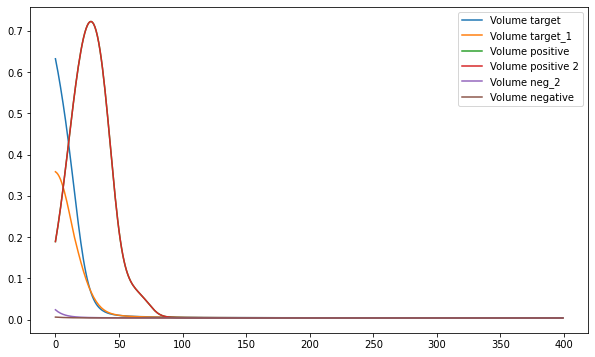

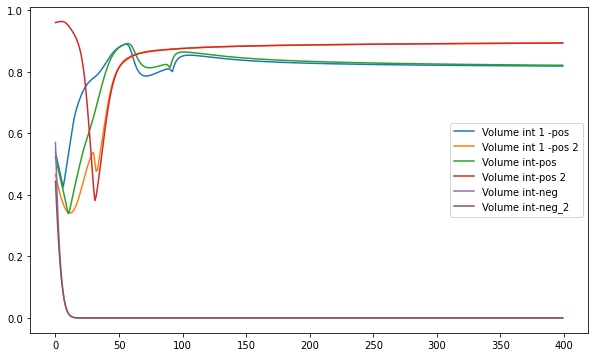

In [99]:
# Training function
learning_rate = 0.1

# Train
#seed_everything(12345)
optimizer = torch.optim.Adam([data_x, data_t, data_y, data_i , data_k, data_z], lr=learning_rate)
epochs = 400
target_list, target_1_list, context_list, context_list_1, context_list_2, negative_list = train(box_target, box_target_1, box_positive, box_negative_4, box_negative_2, box_negative, optimizer, epochs=epochs)


In [26]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, interactive
from copy import copy
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

def load_boxes(myboxes, ty, color):

  import matplotlib._color_data as mcd
  import matplotlib.patches as mpatch
  colors = [name for name in mcd.CSS4_COLORS
            if "xkcd:" + name in mcd.XKCD_COLORS]

  list_ = []
  for i,box in enumerate(myboxes):
    list_epoch = []
    rect = patches.Rectangle((box[0][0], box[0][1]), 
                            box[1][0] - box[0][0], 
                            box[1][1] - box[0][1], 
                            facecolor=color, edgecolor = color, lw=3, label=ty, alpha=0.4)
    
    list_.append(rect)
  return list_

list_targets = load_boxes(target_list, "target", "red")
list_targets_1 = load_boxes(target_1_list, "target", "purple")
print(len(list_targets))
list_contexts_pos = load_boxes(context_list, "positive", "green")
list_contexts_pos_1 = load_boxes(context_list_1, "positive 2", "orange")
list_contexts_pos_2 = load_boxes(context_list_2, "negative_2", "brown")
list_contexts_neg = load_boxes(negative_list, "negative", "black")

def f2(epoch = (0, epochs-1, 1)):

    fig, ax = plt.subplots(figsize=(30, 10))
    plt.xlim([0, +1])
    plt.ylim([0, +1])
   
    new_c=copy(list_targets[epoch])
    new_c_1=copy(list_targets_1[epoch])
    new_pos=copy(list_contexts_pos[epoch])
    new_pos_1=copy(list_contexts_pos_1[epoch])
    new_pos_2=copy(list_contexts_pos_2[epoch])
    new_neg=copy(list_contexts_neg[epoch])
      
    ax.add_patch(new_c)
    ax.add_patch(new_c_1)
    ax.add_patch(new_pos)
    ax.add_patch(new_pos_1)
    ax.add_patch(new_pos_2)
    ax.add_patch(new_neg)
    ax.legend()


interact(f2);

NameError: name 'target_list' is not defined

In [27]:
import numpy as np
torch.manual_seed(2)
random.seed(2)
np.random.seed(2)
torch.cuda.manual_seed(2)
torch.cuda.manual_seed_all(2)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [20]:
from box_embeddings.modules.volume import Volume
from box_embeddings.modules.intersection import Intersection
from box_embeddings.parameterizations.box_tensor import BoxFactory
from box_embeddings.modules import BoxEmbedding
from box_embeddings.initializations import UniformBoxInitializer
import torch
from torch.autograd import Variable
from torch import nn


global use_cuda
use_cuda = torch.cuda.is_available()
device = 0 if use_cuda else -1

class BoxModel(nn.Module):
    def __init__(self, emb_size, embedding_dim, box_vol, box_int):
        super(BoxModel, self).__init__()

        self.use_cuda = torch.cuda.is_available()
        self.device = torch.device("cuda" if self.use_cuda else "cpu")
        #self.initializer = UniformBoxInitializer(dimensions=embedding_dim, num_boxes=emb_size, box_type_factory=BoxFactory("sigmoid_from_vector"),
        #minimum=0., maximum=1, delta_min=0.5, delta_max=1)
        self.embedding_dim = embedding_dim
        self.vocab_size = emb_size
        self.embeddings_word = BoxEmbedding(self.vocab_size, self.embedding_dim)
        self.embeddings_context = BoxEmbedding(self.vocab_size, self.embedding_dim)
        #self.embeddings_word = BoxEmbedding(self.vocab_size, self.embedding_dim, box_factory=BoxFactory("sigmoid_from_vector"))
        #self.embeddings_context = BoxEmbedding(self.vocab_size, self.embedding_dim, box_factory=BoxFactory("sigmoid_from_vector"))
        self.box_vol = box_vol
        self.box_int = box_int

    def forward_pos(self, pos_u, pos_w):
        
        embedding_u = self.embeddings_word(pos_u)
        embedding_w = self.embeddings_context(pos_w)
        
        #embedding_negw = self.embeddings_context(neg_w)
        #print(embedding_negw.data.shape)
        target_vol = self.box_vol(embedding_u)
        positive_vol = self.box_vol(embedding_w)

        #negative_vol = self.box_vol(embedding_negw)

        positive_int_volumes = self.box_vol(self.box_int(embedding_w, embedding_u))

        #negative_int_volumes = self.box_vol(self.box_int(embedding_negw, embedding_u))
        return target_vol, positive_vol, positive_int_volumes
        # return target_vol, positive_vol, negative_vol, positive_int_volumes, negative_int_volumes

    def forward_neg(self, pos_u, neg_w):
    
        embedding_u = self.embeddings_word(pos_u)
        embedding_negw = self.embeddings_context(neg_w)
        
        #embedding_negw = self.embeddings_context(neg_w)
        #print(embedding_negw.data.shape)
        target_vol = self.box_vol(embedding_u)

        
        negative_vol = self.box_vol(embedding_negw)
        negative_int_volumes = self.box_vol(self.box_int(embedding_negw, embedding_u))
        return target_vol, negative_vol, negative_int_volumes

        # return target_vol, positive_vol, negative_vol, positive_int_volumes, negative_int_volumes

box_vol = Volume(volume_temperature=0.1, intersection_temperature=0.0001)
box_int = Intersection(intersection_temperature=0.0001)

model = BoxModel(30000, 2, box_vol, box_int)



In [28]:
from torch import optim
from torch import autograd
#def loss_5( target_vol, positive_vol, negative_vol, positive_int_volumes, negative_int_volumes, neg_count):
def loss_5( target_vol, positive_vol, positive_int_volumes, neg_count):

        #average_positive = (positive_int_volumes) 
        with torch.autograd.set_detect_anomaly(True):
            average_positive = positive_int_volumes 
            loss = (-average_positive)
            #print("Intersezioni positive: ", torch.exp(torch.mean((positive_int_volumes - positive_vol))))
            #print("Intersezioni positive: ", torch.exp(torch.mean((positive_int_volumes - torch.minimum(target_vol,positive_vol))))  )
            return loss

def loss_5_neg( target_vol, negative_vol, negative_int_volumes, neg_count):

            #average_positive = (positive_int_volumes) 
        with torch.autograd.set_detect_anomaly(True):
            average_negative = negative_int_volumes 
            loss = (average_negative)
            #print("Intersezioni negative: ", torch.exp(torch.mean((negative_int_volumes - torch.minimum(target_vol,negative_vol))))  )
            #print("Intersezioni negative: ", torch.exp(torch.mean((negative_int_volumes - negative_vol))))

            return loss

def train():

    optimizer = optim.Adam(model.parameters(), lr=0.1)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

    loss_positive = float('-inf')
    inputs = torch.tensor([1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4])
    labels = torch.tensor([0,2,3,4,0,1,3,4,0,1,2,4,0,1,2,3])
    negative = torch.tensor([[7,4,98],[7,4,6],[7,8,65],[7,34,56],[100,23,43],[780,12,64],[7,90,123],[7,432,64],[7,125,62],[7,78,87],[400,45,54],[780,58,91],[7,85,243],[7,111,321],[7,890,876],[90,43,34]])


    for i in range(0,50):
        loss_neg = 0
        optimizer.zero_grad()
        target_vol, positive_vol, positive_int_volumes = model.forward_pos(inputs, labels)



        # tensor = torch.split(negative, 1,1)
        # for el in tensor:
        #     target_vol, negative_vol, negative_int_volumes = model.forward_neg(inputs, el)
        #     loss_neg += loss_5_neg(target_vol, negative_vol, negative_int_volumes, 3)
        target_vol, negative_vol, negative_int_volumes = model.forward_neg(inputs, negative)
        loss_neg = loss_5_neg(target_vol, negative_vol, negative_int_volumes, 3)
        
        loss_pos = loss_5(target_vol, positive_vol, positive_int_volumes, 3)
        
        #loss = torch.mean(loss_pos) + torch.mean(loss_neg)

        loss = torch.mean(loss_pos) + torch.mean(torch.sum(loss_neg,1))
        print("LOSS POS : ", torch.mean((loss_pos)).item(), "LOSS NEG : ", torch.mean(torch.sum(loss_neg,1)).item())
        if torch.mean(loss_pos).item()>loss_positive:
            dicty = {
                    'epoch': i,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss,
                    'emb_size': model.vocab_size,
                    'emb_dim': model.embedding_dim,
                    'volume': model.box_vol,
                    'inter': model.box_int,
                    }
            loss_positive = torch.mean(loss_pos).item()
        print(loss.item())
        loss.backward()
        optimizer.step()
        scheduler.step()
    
    print(loss_positive)
    torch.save(dicty, 'best_model.pt')

train() 

LOSS POS :  12.716205596923828 LOSS NEG :  -155.6600799560547
-142.94387817382812
LOSS POS :  11.989089012145996 LOSS NEG :  -157.52708435058594
-145.53799438476562
LOSS POS :  11.3800687789917 LOSS NEG :  -159.48765563964844
-148.1075897216797
LOSS POS :  10.609319686889648 LOSS NEG :  -161.25404357910156
-150.6447296142578
LOSS POS :  9.78643798828125 LOSS NEG :  -162.94456481933594
-153.1581268310547
LOSS POS :  8.966564178466797 LOSS NEG :  -164.62037658691406
-155.65380859375
LOSS POS :  8.1857328414917 LOSS NEG :  -166.29148864746094
-158.1057586669922
LOSS POS :  7.598779678344727 LOSS NEG :  -167.93435668945312
-160.3355712890625
LOSS POS :  7.250625133514404 LOSS NEG :  -169.44088745117188
-162.1902618408203
LOSS POS :  6.9284844398498535 LOSS NEG :  -170.58578491210938
-163.6573028564453
LOSS POS :  6.599732398986816 LOSS NEG :  -171.2500457763672
-164.6503143310547
LOSS POS :  6.258007049560547 LOSS NEG :  -171.6302032470703
-165.3721923828125
LOSS POS :  5.946168422698975 L

In [22]:
best_model = torch.load("best_model.pt")
new_model = BoxModel(best_model['emb_size'], best_model['emb_dim'], best_model['volume'], best_model['inter'])
new_model.load_state_dict(best_model['model_state_dict'])
boxes_target = new_model.embeddings_word.all_boxes
boxes_context = new_model.embeddings_context.all_boxes

In [23]:

embedding_all_target = new_model.embeddings_word.all_boxes

index_word = 2
embedding_word = embedding_all_target[index_word]   

sim3 = torch.exp(model.box_vol(new_model.box_int(embedding_all_target, embedding_word) )- torch.maximum(new_model.box_vol(embedding_word),new_model.box_vol(embedding_all_target)))

idx = (-sim3).argsort()

print(idx[0:50])

tensor([    2,     4,     1,     3, 13112, 14501, 12059, 12663, 18637,  3367,
         2754, 21074, 27414,  1368,  1864, 20035, 20771, 27674,  7781,  3606,
         2516,  3810, 20320, 26796,  7448, 14146,   700, 23446, 19515, 28794,
        15817, 13709, 10776, 25643, 23311, 12869, 19787, 27375, 27947, 23389,
        23515, 24842, 18054, 22117,  4258, 24996, 18437,  1706,  3101, 10768])


In [25]:
import matplotlib.patches as patches
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib._color_data as mcd
import random
import plotly.graph_objects as go

colors = [name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS]


def extract_embeddings(boxes):
        list_box = []
        list_box.append(boxes.z.data.tolist())
        list_box.append(boxes.Z.data.tolist())        

        rect = patches.Rectangle((list_box[0][0], list_box[0][1]), 
                    list_box[1][0] - list_box[0][0], 
                    list_box[1][1] - list_box[0][1])
        
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0

        return rect, [list_box[0][0], list_box[0][1], list_box[1][0], list_box[1][1]], cx, cy

lis_all = list(range(10))
center_x = []
center_y = []
words = []
all_rect = []
points = []

for i in lis_all:
    emb = boxes_target[i]
    rect, p, cx, cy = extract_embeddings(emb)
    all_rect.append(rect)
    points.append(p)
    center_x.append(cx)
    center_y.append(cy)
    words.append(str(i))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=center_x,
        y=center_y,
        mode="text",
        text=words,
        textposition="middle center",
        textfont=dict(color="black"),
    )
)

fig.update_xaxes(range=[-3, +3])
fig.update_yaxes(range=[-3, +3])

for i, point in enumerate(points):
  color = "#%06x" % random.randint(0, 0xFFFFFF)
  fig.add_shape(type="rect",
      x0=point[0], y0=point[1], x1=point[2], y1=point[3],
      line=dict(color=color),
  )

fig.update_layout(margin=dict(l=80, r=80, t=80, b=80),)

fig.show()

lis_all = list(range(10))
center_x = []
center_y = []
words = []
all_rect = []
points = []

for i in lis_all:
    emb = boxes_context[i]
    rect, p, cx, cy = extract_embeddings(emb)
    all_rect.append(rect)
    points.append(p)
    center_x.append(cx)
    center_y.append(cy)
    words.append(str(i))

fig1 = go.Figure()

fig1.add_trace(
    go.Scatter(
        x=center_x,
        y=center_y,
        mode="text",
        text=words,
        textposition="middle center",
        textfont=dict(color="black"),
    )
)

fig1.update_xaxes(range=[-3, +3])
fig1.update_yaxes(range=[-3, +3])

for i, point in enumerate(points):
  color = "#%06x" % random.randint(0, 0xFFFFFF)
  fig1.add_shape(type="rect",
      x0=point[0], y0=point[1], x1=point[2], y1=point[3],
      line=dict(color=color),
  )

fig1.update_layout(margin=dict(l=80, r=80, t=80, b=80),)

fig1.show()



In [256]:
uno = model.embeddings_word.all_boxes[1]
due = model.embeddings_word.all_boxes[4]

intersection = Intersection(intersection_temperature = 0.001)
volume = Volume(volume_temperature=0.1, intersection_temperature=0.001)

print(torch.exp(volume(intersection(uno, due)) - torch.minimum(volume(uno), volume(due)) ))


tensor(0.0063, grad_fn=<ExpBackward0>)
